In [3]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Approximating sin(x)

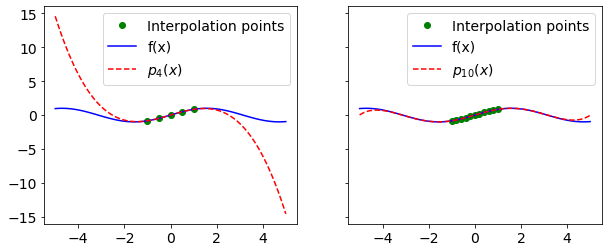

In [4]:
xp = np.linspace(-5,5,100)


from scipy.interpolate import lagrange, BarycentricInterpolator


f, (ax1,ax2) = plt.subplots(1,2, sharey = True, figsize = (10,4))
xi = np.linspace(-1,1,5)
p4 = lagrange(xi, np.sin(xi))
ax1.plot(xi, np.sin(xi), 'go', xp, np.sin(xp), 'b-', xp, p4(xp), 'r--')
ax1.legend(('Interpolation points', 'f(x)', '$p_4(x)$'), fontsize = 14)
xi = np.linspace(-1,1,11)
p10 = lagrange(xi, np.sin(xi))
ax2.plot(xi, np.sin(xi), 'go', xp, np.sin(xp), 'b-', xp, p10(xp), 'r--')
ax2.legend(('Interpolation points', 'f(x)', '$p_{10}(x)$'), fontsize = 14)

### Runge's phenomena

First we consider uniformly spaced points in $[-5,5]$

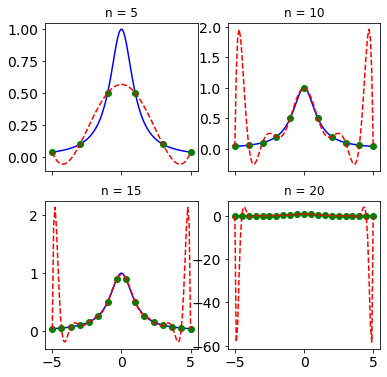

In [5]:
f, axarray = plt.subplots(2,2, sharex = True,  figsize = (6,6))

xp = np.linspace(-5,5,100)
runge = lambda x: 1/(1+x**2)

n = [5,10,15,20]

for j, ax in enumerate(axarray.flatten()):
    xi = np.linspace(-5,5,n[j]+1)
    pn = lagrange(xi, runge(xi))
    ax.plot(xp, runge(xp), 'b-', xi, runge(xi), 'go', xp, pn(xp), 'r--')
    ax.set_title('n = %d' %(n[j]))

Text(0.5, 1.0, '$\\max_{x\\in[-5,5]}|f(x) - p_n(x)|$, with uniform points')

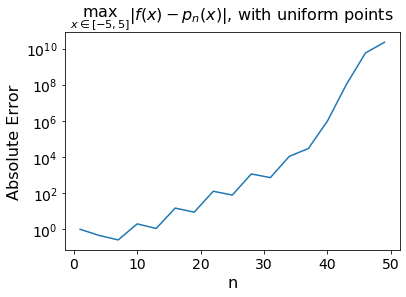

In [9]:
nlst = np.arange(1,50,3)
xp = np.linspace(-5,5,1000)
err = []

for j, n in enumerate(nlst):
    xi = np.linspace(-5,5,n+1)
    pn = lagrange(xi, runge(xi))
    err.append(np.linalg.norm(runge(xp) - pn(xp), np.inf))


plt.semilogy(nlst, err)
plt.xlabel('n', fontsize = 16)
plt.ylabel('Absolute Error', fontsize = 16)
plt.title('$\max_{x\in[-5,5]}|f(x) - p_n(x)|$, with uniform points', fontsize = 16)

### Runge's function with interpolation at Chebyshev points

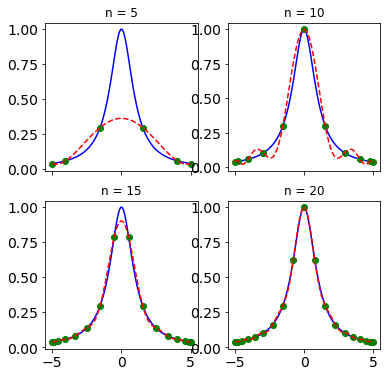

In [7]:
f, axarray = plt.subplots(2,2, sharex = True,  figsize = (6,6))

xp = np.linspace(-5,5,100)
runge = lambda x: 1/(1+x**2)

n = [5,10,15,20]

for j, ax in enumerate(axarray.flatten()):
    xi = 5*np.cos(np.arange(n[j]+1)*np.pi/n[j])
    pn = BarycentricInterpolator(xi, runge(xi))
    ax.plot(xp, runge(xp), 'b-', xi, runge(xi), 'go', xp, pn(xp), 'r--')
    ax.set_title('n = %d' %(n[j]))

Text(0.5, 1.0, '$\\max_{x\\in[-5,5]}|f(x) - p_n(x)|$, with Chebyshev points')

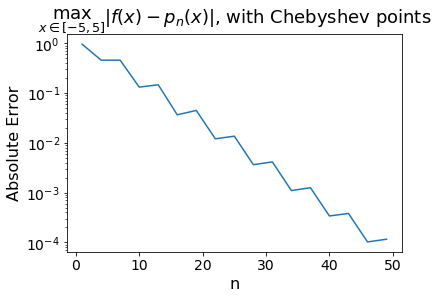

In [8]:
nlst = np.arange(1,50,3)
xp = np.linspace(-5,5,1000)
err = []

for j, n in enumerate(nlst):
    xi = 5*np.cos(np.arange(n+1)*np.pi/n)
    pn = BarycentricInterpolator(xi, runge(xi))
    err.append(np.linalg.norm(runge(xp) - pn(xp), np.inf))
    
plt.semilogy(nlst, err)
plt.xlabel('n', fontsize = 16)
plt.ylabel('Absolute Error', fontsize = 16)
plt.title('$\max_{x\in[-5,5]}|f(x) - p_n(x)|$, with Chebyshev points', fontsize = 18)